In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Carregar o CSV
df = pd.read_csv('dados.csv', sep=';')

# Mostrar todas as colunas
print("Colunas do CSV:")
for col in df.columns:
    print(col)

Colunas do CSV:
Bloco 
Bairro
Região
Data
Data Relativa
Concentração
Desfile
Final
Local da Concentraçao
Percurso
Público Estimado
Ano do primeiro desfile
Unnamed: 12


In [5]:
# Ajustar nomes exatos das colunas
coluna_bloco = "Bloco "
coluna_data = "Data"
coluna_bairro = "Bairro"

# Converter coluna de data
df[coluna_data] = pd.to_datetime(df[coluna_data], errors="coerce")

# --- Frequência de blocos por dia ---
freq_dia = df.groupby(coluna_data)[coluna_bloco].count().reset_index()
freq_dia.columns = ["Data", "Qtd_Blocos"]


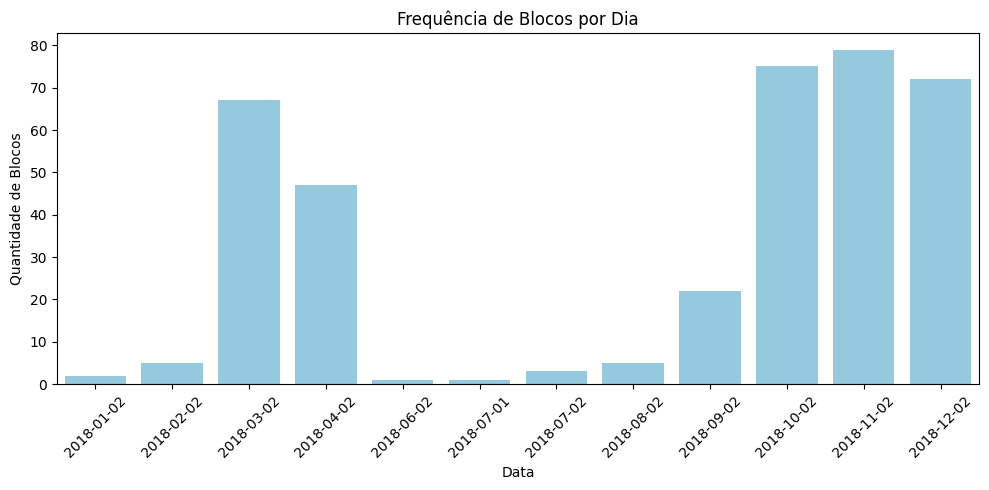

In [8]:

# --- Gráfico: Frequência de blocos por dia ---
plt.figure(figsize=(10,5))
sns.barplot(data=freq_dia, x='Data', y='Qtd_Blocos', color='skyblue')
plt.xticks(rotation=45)
plt.title('Frequência de Blocos por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Blocos')
plt.tight_layout()
plt.show()



In [9]:
# --- Quantidade de blocos por bairro ---
blocos_bairro = df.groupby("Bairro")[coluna_bloco].count().reset_index()
blocos_bairro.columns = ["Bairro", "Qtd_Blocos"]

# --- Percentual de concentração ---
total_blocos = blocos_bairro["Qtd_Blocos"].sum()
blocos_bairro["Percentual"] = (blocos_bairro["Qtd_Blocos"] / total_blocos) * 100


C:\Users\petri\AppData\Local\Temp\ipykernel_9320\1783439368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=blocos_bairro, x="Bairro", y="Percentual", palette="viridis")


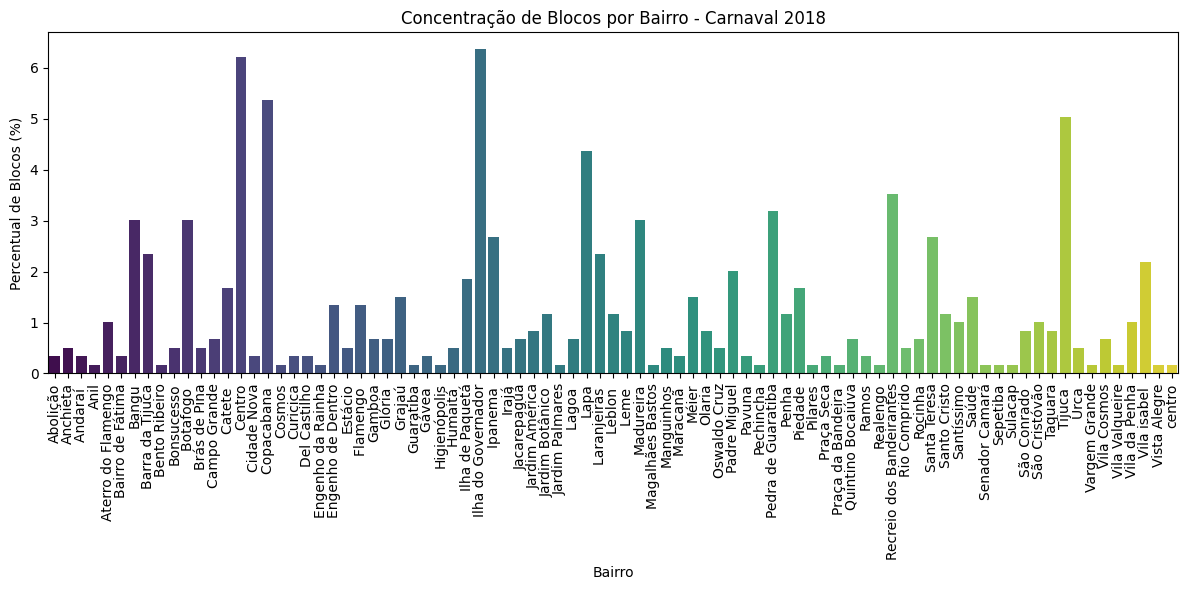

In [10]:
# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=blocos_bairro, x="Bairro", y="Percentual", palette="viridis")
plt.xticks(rotation=90)
plt.title("Concentração de Blocos por Bairro - Carnaval 2018")
plt.xlabel("Bairro")
plt.ylabel("Percentual de Blocos (%)")
plt.tight_layout()
plt.show()